<a href="https://colab.research.google.com/github/aaronjoel/DeepUnderstandingOfDeepLearning/blob/main/DUDL_MeasurePerformance_ARPF_Example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Import libraries

# for DL modeling
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# For number-crunching
import numpy as np
import scipy.stats as stats

# For dataset management
import pandas as pd

# For data visualisation
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline as mb
mb.set_matplotlib_formats('svg')

## Import and process the data

In [2]:
# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data = data[data['total sulfur dioxide'] < 200]  # drop a few outliers
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# z-score all columns except for quality
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('quality')
data[cols2zscore] = data[cols2zscore].apply(stats.zscore)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5
1,-0.298673,1.966614,-1.391823,0.049020,0.222827,0.877032,0.654661,0.025923,-0.723652,0.127837,-0.583341,5
2,-0.298673,1.295976,-1.185980,-0.165951,0.095334,-0.081247,0.246069,0.132100,-0.334209,-0.049176,-0.583341,5
3,1.653579,-1.386577,1.489975,-0.452579,-0.265897,0.110409,0.434650,0.662984,-0.983280,-0.462207,-0.583341,6
4,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5


In [5]:
# create a new column for binarized (boolean) quality
data['boolQuality'] = 0

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,boolQuality
0,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0
1,-0.298673,1.966614,-1.391823,0.049020,0.222827,0.877032,0.654661,0.025923,-0.723652,0.127837,-0.583341,5,0
2,-0.298673,1.295976,-1.185980,-0.165951,0.095334,-0.081247,0.246069,0.132100,-0.334209,-0.049176,-0.583341,5,0
3,1.653579,-1.386577,1.489975,-0.452579,-0.265897,0.110409,0.434650,0.662984,-0.983280,-0.462207,-0.583341,6,0
4,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0


In [7]:
data['boolQuality'][data['quality'] > 5] = 1

<ipython-input-7-1882349398>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['boolQuality'][data['quality'] > 5] = 1
<ipython-input-7-1882349398>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,boolQuality
0,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0
1,-0.298673,1.966614,-1.391823,0.049020,0.222827,0.877032,0.654661,0.025923,-0.723652,0.127837,-0.583341,5,0
2,-0.298673,1.295976,-1.185980,-0.165951,0.095334,-0.081247,0.246069,0.132100,-0.334209,-0.049176,-0.583341,5,0
3,1.653579,-1.386577,1.489975,-0.452579,-0.265897,0.110409,0.434650,0.662984,-0.983280,-0.462207,-0.583341,6,1
4,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0


In [9]:
# Convert from pandas dataframe to tensor
dataT = torch.tensor( data[cols2zscore].values ).float()
labels = torch.tensor( data['boolQuality'].values ).float()
labels = labels[:, None]  # transform to matrix

In [10]:
labels.shape

torch.Size([1597, 1])

In [11]:
dataT.shape

torch.Size([1597, 11])

In [12]:
# use scikit-learn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(dataT, labels, test_size=.1, random_state=42)

In [13]:
# convert them into PyTorch Datasets (note: already converted to tensors)
train_dataDataset = torch.utils.data.TensorDataset(train_data, train_labels)
test_dataDataset = torch.utils.data.TensorDataset(test_data, test_labels)

In [14]:
# finally, create dataloaders
train_loader = DataLoader(train_dataDataset, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataDataset, batch_size=test_dataDataset.tensors[0].shape[0])

In [15]:
len(train_loader)

44

In [16]:
32 * 44

1408

In [17]:
len(test_loader)

1

In [18]:
class ANNwine(nn.Module):
  def __init__(self):
    super().__init__()

    ## input layer
    self.input = nn.Linear(in_features=11, out_features=16)

    ## hidden layers
    self.fc1 = nn.Linear(16, 32)
    self.fc2 = nn.Linear(32, 32)

    ## output layer
    self.output = nn.Linear(32, 1)


  def forward(self, x):
    x = F.relu(self.input(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return self.output(x)



In [19]:
# global parameters
num_epochs = 1000

def trainTheModel(model):

  # loss function and optimizer
  loss_fun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=.01)

  # initialize losses
  losses = torch.zeros(num_epochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epoch in range(num_epochs):
    # loop over training data batches
    batchAcc = []
    batchLoss = []
    for X, y in train_loader:
      # forward pass and loss
      yhat = model(X)
      loss = loss_fun(yhat, y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append( loss.item() )

      # compute training accuracy for this batch
      batchAcc.append( 100*torch.mean( ( (yhat > 0) == y).float() ).item() )
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epoch] = np.mean(batchLoss)

    # test accuracy
    X, y = next(iter(test_loader))  # extract X, y from test dataloader
    with torch.no_grad():  # deactivates autograd
      yhat = model(X)
    testAcc.append( 100*torch.mean( ( (yhat > 0) == y).float() ).item() )

  # function output
  return trainAcc, testAcc, losses

## Now to create the fitted model

In [20]:
# create and train a model
winenet = ANNwine()
trainAcc, testAcc, losses = trainTheModel(winenet)

## Compute the performance measures on the train and test data

In [21]:
# predictions for training data
train_predictions = winenet(train_loader.dataset.tensors[0])
train_predictions

tensor([[ 7.3747],
        [-4.5112],
        [-3.0500],
        ...,
        [-2.4569],
        [-5.1664],
        [-1.2355]], grad_fn=<AddmmBackward0>)

In [22]:
# predictions for test data
test_predictions = winenet(test_loader.dataset.tensors[0])
test_predictions

tensor([[ 7.8579e+00],
        [-2.5801e+00],
        [-5.2789e-01],
        [-5.2729e-01],
        [ 1.5419e+00],
        [-4.6584e+00],
        [-9.4124e+00],
        [-3.5208e+00],
        [-4.4103e-02],
        [ 1.1882e+00],
        [ 5.8224e+00],
        [ 3.9215e-01],
        [ 2.6044e-01],
        [-1.9850e+00],
        [ 4.0664e-01],
        [ 1.0976e+00],
        [-1.1243e+00],
        [ 9.9705e+00],
        [ 5.9312e+00],
        [-2.2340e+00],
        [-1.7342e+00],
        [ 9.3590e-02],
        [-1.2958e+00],
        [ 4.2571e+00],
        [ 1.5243e+00],
        [-4.6515e+00],
        [ 4.5086e+00],
        [-1.8294e+00],
        [-3.1946e+00],
        [ 2.1350e+00],
        [-4.5496e+00],
        [-1.8979e+00],
        [ 1.2078e+00],
        [-1.2465e+00],
        [ 5.4127e-01],
        [-7.0075e-03],
        [ 2.8243e+00],
        [ 3.1304e+00],
        [ 6.7676e+00],
        [ 3.8047e+00],
        [-2.0207e+00],
        [ 6.9020e-01],
        [ 2.1262e+00],
        [-4

In [23]:
import sklearn.metrics as skm

# initialize vectors
train_metrics = [0, 0, 0, 0]
test_metrics  = [0, 0, 0, 0]

# training
train_metrics[0] = skm.accuracy_score (train_loader.dataset.tensors[1], train_predictions > 0)
train_metrics[1] = skm.precision_score(train_loader.dataset.tensors[1], train_predictions > 0)
train_metrics[2] = skm.recall_score   (train_loader.dataset.tensors[1], train_predictions > 0)
train_metrics[3] = skm.f1_score       (train_loader.dataset.tensors[1], train_predictions > 0)


# test
test_metrics[0] = skm.accuracy_score (test_loader.dataset.tensors[1], test_predictions > 0)
test_metrics[1] = skm.precision_score(test_loader.dataset.tensors[1], test_predictions > 0)
test_metrics[2] = skm.recall_score   (test_loader.dataset.tensors[1], test_predictions > 0)
test_metrics[3] = skm.f1_score       (test_loader.dataset.tensors[1], test_predictions > 0)


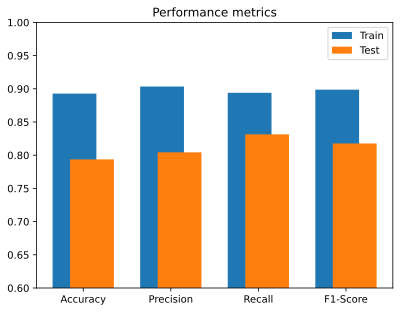

In [24]:
plt.bar(np.arange(4) - .1, train_metrics, .5)
plt.bar(np.arange(4) + .1, test_metrics, .5)

plt.xticks([0, 1, 2, 3], ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
plt.ylim([.6, 1])

plt.legend(['Train', 'Test'])
plt.title('Performance metrics')

plt.show()

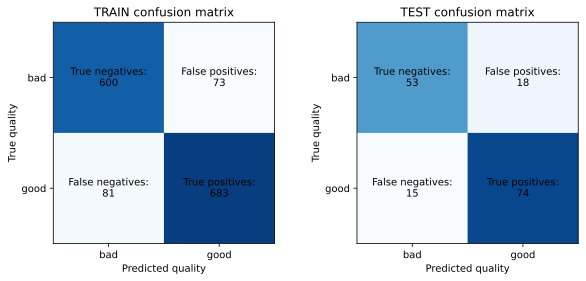

In [28]:
# Confusion matrices
trainConf = skm.confusion_matrix(train_loader.dataset.tensors[1], train_predictions > 0)
testConf  = skm.confusion_matrix(test_loader.dataset.tensors[1], test_predictions > 0)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))


# confmat during TRAIN
ax[0].imshow(trainConf, 'Blues', vmax=len(train_predictions) / 2)
ax[0].set_xticks([0, 1])
ax[0].set_yticks([0, 1])
ax[0].set_xticklabels(['bad', 'good'])
ax[0].set_yticklabels(['bad', 'good'])
ax[0].set_xlabel('Predicted quality')
ax[0].set_ylabel('True quality')
ax[0].set_title('TRAIN confusion matrix')

# add text labels
ax[0].text(0, 0, f'True negatives:\n{trainConf[0, 0]}',  ha='center', va='center')
ax[0].text(0, 1, f'False negatives:\n{trainConf[1, 0]}', ha='center', va='center')
ax[0].text(1, 1, f'True positives:\n{trainConf[1, 1]}',  ha='center', va='center')
ax[0].text(1, 0, f'False positives:\n{trainConf[0, 1]}', ha='center', va='center')

# confmat during TEST
ax[1].imshow(testConf, 'Blues', vmax=len(test_predictions) / 2)
ax[1].set_xticks([0, 1])
ax[1].set_yticks([0, 1])
ax[1].set_xticklabels(['bad', 'good'])
ax[1].set_yticklabels(['bad', 'good'])
ax[1].set_xlabel('Predicted quality')
ax[1].set_ylabel('True quality')
ax[1].set_title('TEST confusion matrix')

# add text labels
ax[1].text(0, 0, f'True negatives:\n{testConf[0,0]}', ha='center', va='center')
ax[1].text(0, 1, f'False negatives:\n{testConf[1, 0]}', ha='center', va='center')
ax[1].text(1, 1, f'True positives:\n{testConf[1, 1]}',  ha='center', va='center')
ax[1].text(1, 0, f'False positives:\n{testConf[0, 1]}', ha='center', va='center')

plt.show()

In [30]:
skm.confusion_matrix(train_loader.dataset.tensors[1], train_predictions > 0, normalize='true')


array([[0.89153046, 0.10846954],
       [0.10602094, 0.89397906]])